<a href="https://www.kaggle.com/code/lalit7881/screen-sleep-stress-study?scriptVersionId=297959531" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/screen-time-sleep-and-stress-analysis-dataset/Smartphone_Usage_Productivity_Dataset_50000.csv


## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/screen-time-sleep-and-stress-analysis-dataset/Smartphone_Usage_Productivity_Dataset_50000.csv")

In [3]:
df.head()

,User_ID,Age,Gender,Occupation,Device_Type,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
0,U1,58,Male,Professional,Android,1.3,6.7,6,8.8,4,42,1,8.7
1,U2,25,Male,Professional,Android,1.2,1.5,5,6.4,1,51,3,5.1
2,U3,19,Male,Student,iOS,5.3,5.7,5,9.0,4,14,5,6.3
3,U4,35,Female,Business Owner,iOS,5.8,2.5,2,5.7,3,36,6,12.8
4,U5,33,Male,Freelancer,Android,7.9,1.3,4,5.7,3,37,5,9.9


In [4]:
df.tail()

,User_ID,Age,Gender,Occupation,Device_Type,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
49995,U49996,44,Male,Business Owner,Android,5.9,5.4,5,6.6,1,11,5,3.0
49996,U49997,42,Other,Business Owner,Android,2.9,7.4,9,6.3,2,20,4,6.2
49997,U49998,27,Female,Freelancer,iOS,1.4,2.5,4,6.7,9,39,4,5.1
49998,U49999,41,Female,Business Owner,iOS,8.9,3.0,6,5.5,2,51,0,9.2
49999,U50000,46,Other,Freelancer,Android,8.8,2.8,3,5.4,1,54,5,6.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    50000 non-null  object 
 1   Age                        50000 non-null  int64  
 2   Gender                     50000 non-null  object 
 3   Occupation                 50000 non-null  object 
 4   Device_Type                50000 non-null  object 
 5   Daily_Phone_Hours          50000 non-null  float64
 6   Social_Media_Hours         50000 non-null  float64
 7   Work_Productivity_Score    50000 non-null  int64  
 8   Sleep_Hours                50000 non-null  float64
 9   Stress_Level               50000 non-null  int64  
 10  App_Usage_Count            50000 non-null  int64  
 11  Caffeine_Intake_Cups       50000 non-null  int64  
 12  Weekend_Screen_Time_Hours  50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usag

In [6]:
df.describe()

,Age,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,39.034960,6.509116,4.267250,5.503760,6.497744,5.504500,32.43898,3.004580,8.006844
std,12.414877,3.170903,2.164743,2.874806,1.449551,2.871095,16.12151,1.996657,3.461300
min,18.000000,1.000000,0.500000,1.000000,4.000000,1.000000,5.00000,0.000000,2.000000
25%,28.000000,3.800000,2.400000,3.000000,5.200000,3.000000,18.00000,1.000000,5.000000
50%,39.000000,6.500000,4.300000,5.500000,6.500000,6.000000,32.00000,3.000000,8.000000
75%,50.000000,9.200000,6.100000,8.000000,7.800000,8.000000,46.00000,5.000000,11.000000
max,60.000000,12.000000,8.000000,10.000000,9.000000,10.000000,60.00000,6.000000,14.000000


In [7]:
df.dtypes

User_ID                       object
Age                            int64
Gender                        object
Occupation                    object
Device_Type                   object
Daily_Phone_Hours            float64
Social_Media_Hours           float64
Work_Productivity_Score        int64
Sleep_Hours                  float64
Stress_Level                   int64
App_Usage_Count                int64
Caffeine_Intake_Cups           int64
Weekend_Screen_Time_Hours    float64
dtype: object

In [8]:
df.shape

(50000, 13)

In [9]:
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Device_Type                  0
Daily_Phone_Hours            0
Social_Media_Hours           0
Work_Productivity_Score      0
Sleep_Hours                  0
Stress_Level                 0
App_Usage_Count              0
Caffeine_Intake_Cups         0
Weekend_Screen_Time_Hours    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.nunique()

User_ID                      50000
Age                             43
Gender                           3
Occupation                       4
Device_Type                      2
Daily_Phone_Hours              111
Social_Media_Hours              76
Work_Productivity_Score         10
Sleep_Hours                     51
Stress_Level                    10
App_Usage_Count                 56
Caffeine_Intake_Cups             7
Weekend_Screen_Time_Hours      121
dtype: int64

In [12]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Occupation', 'Device_Type',
       'Daily_Phone_Hours', 'Social_Media_Hours', 'Work_Productivity_Score',
       'Sleep_Hours', 'Stress_Level', 'App_Usage_Count',
       'Caffeine_Intake_Cups', 'Weekend_Screen_Time_Hours'],
      dtype='object')

## Data visualizations

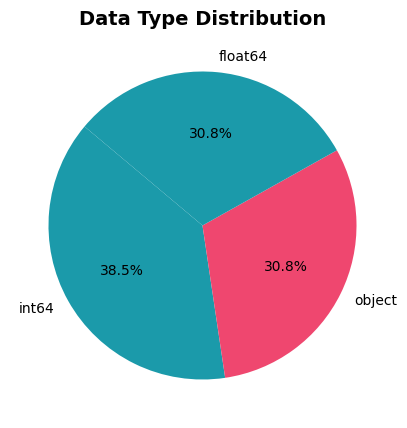

In [13]:
plt.figure(figsize=(8,5))

type_counts = df.dtypes.value_counts()

colors = ['#1B9AAA', '#EF476F']  # Teal & Pink

plt.pie(type_counts, 
        labels=type_counts.index.astype(str),
        autopct='%1.1f%%',
        colors=colors,
        startangle=140)

plt.title("Data Type Distribution", fontsize=14, fontweight='bold')
plt.show()

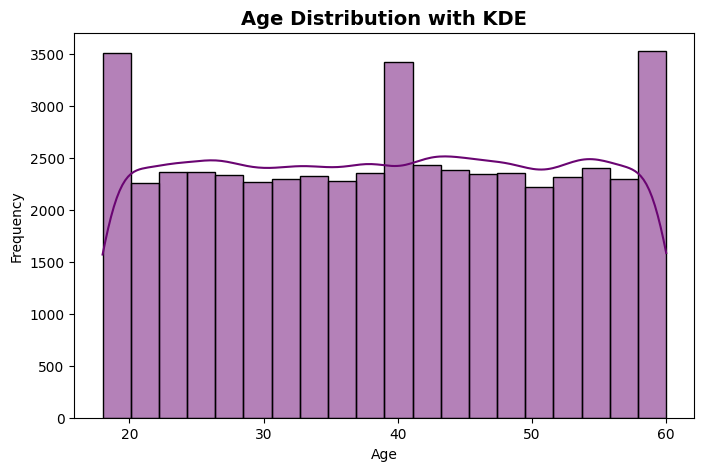

In [14]:
plt.figure(figsize=(8,5))

sns.histplot(df['Age'], 
             kde=True, 
             color='#6A0572',   # Deep Purple
             bins=20)

plt.title("Age Distribution with KDE", fontsize=14, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


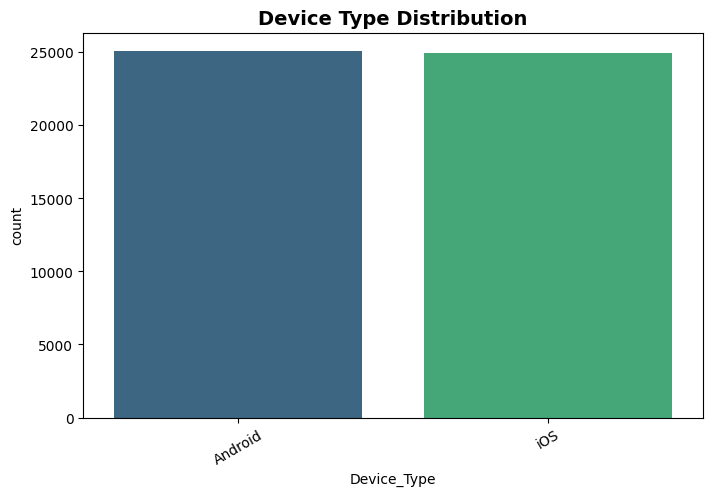

In [15]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, 
              x='Device_Type', 
              palette='viridis')

plt.title("Device Type Distribution", fontsize=14, fontweight='bold')
plt.xticks(rotation=30)
plt.show()


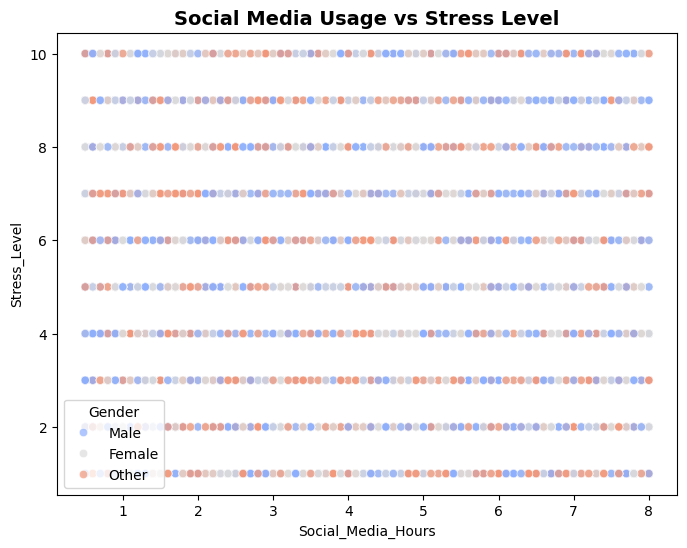

In [16]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=df,
                x='Social_Media_Hours',
                y='Stress_Level',
                hue='Gender',
                palette='coolwarm',
                alpha=0.7)

plt.title("Social Media Usage vs Stress Level", fontsize=14, fontweight='bold')
plt.show()


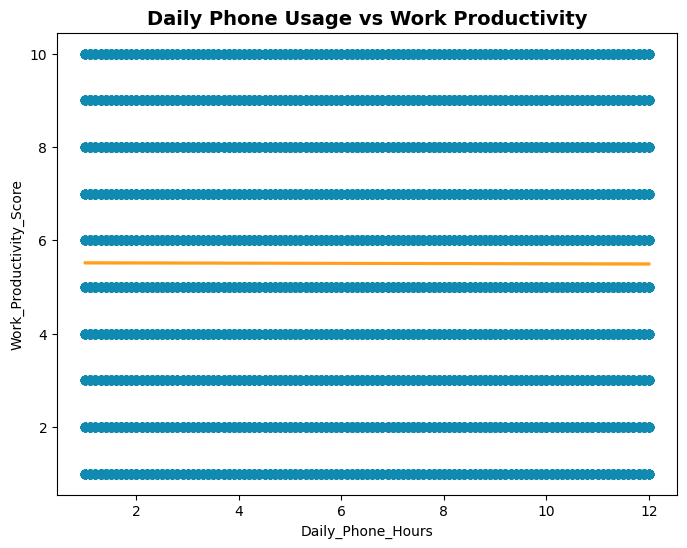

In [17]:
plt.figure(figsize=(8,6))

sns.regplot(data=df,
            x='Daily_Phone_Hours',
            y='Work_Productivity_Score',
            scatter_kws={'color':'#118AB2'},
            line_kws={'color':'#FF9F1C'})

plt.title("Daily Phone Usage vs Work Productivity", fontsize=14, fontweight='bold')
plt.show()


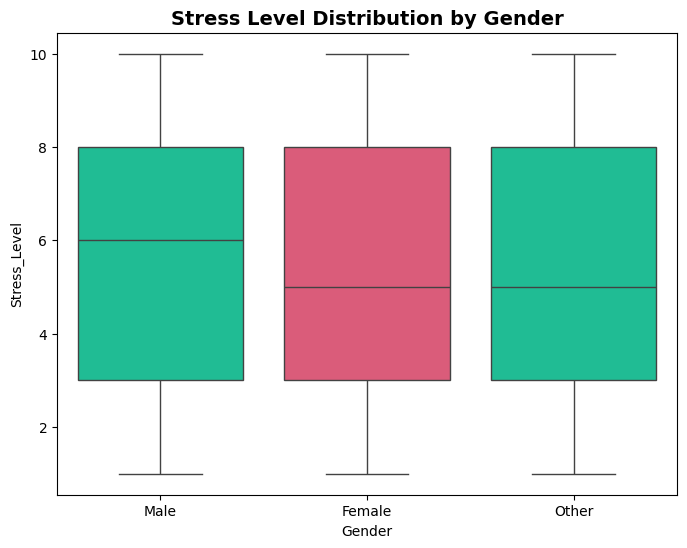

In [18]:
plt.figure(figsize=(8,6))

sns.boxplot(data=df,
            x='Gender',
            y='Stress_Level',
            palette=['#06D6A0', '#EF476F'])

plt.title("Stress Level Distribution by Gender", fontsize=14, fontweight='bold')
plt.show()


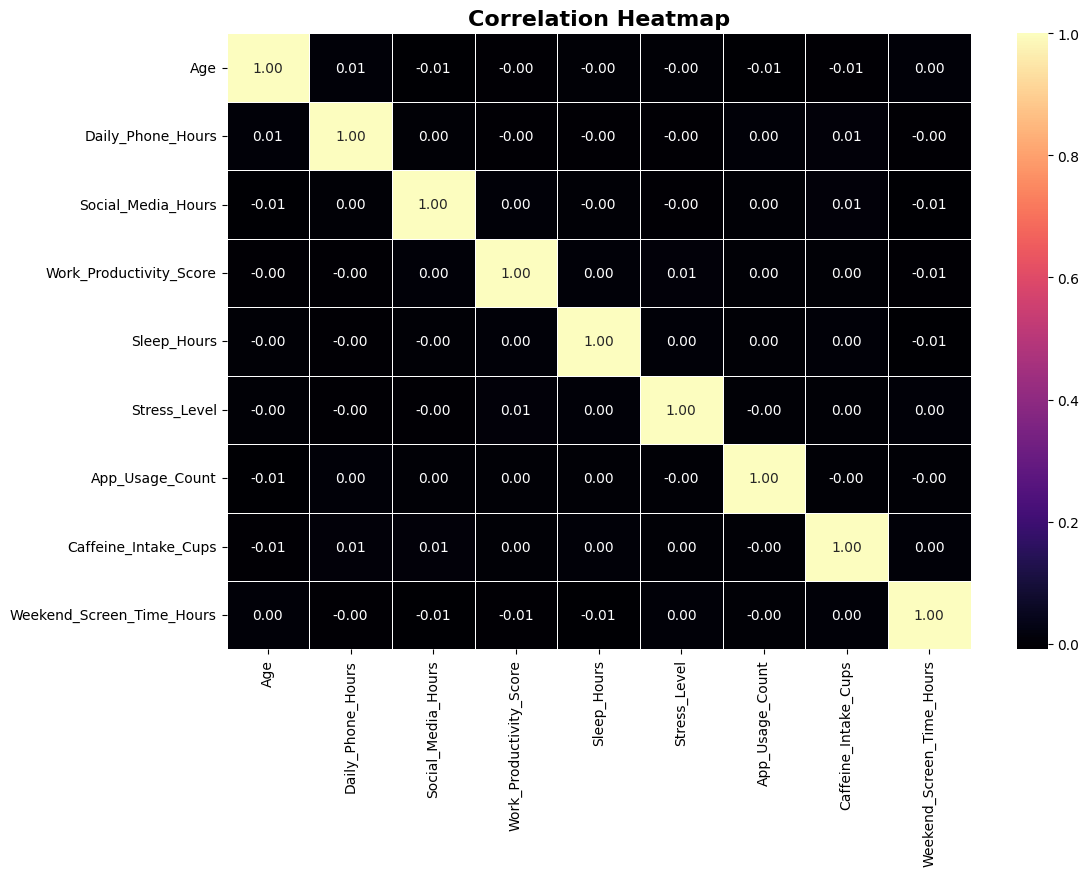

In [19]:
plt.figure(figsize=(12,8))

corr = df.corr(numeric_only=True)

sns.heatmap(corr,
            annot=True,
            cmap='magma',
            fmt='.2f',
            linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.show()


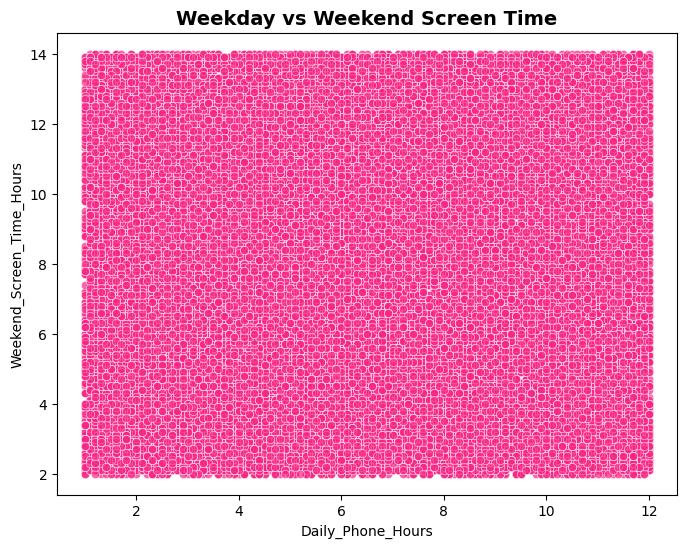

In [20]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=df,
                x='Daily_Phone_Hours',
                y='Weekend_Screen_Time_Hours',
                color='#F72585',
                alpha=0.7)

plt.title("Weekday vs Weekend Screen Time", fontsize=14, fontweight='bold')
plt.show()


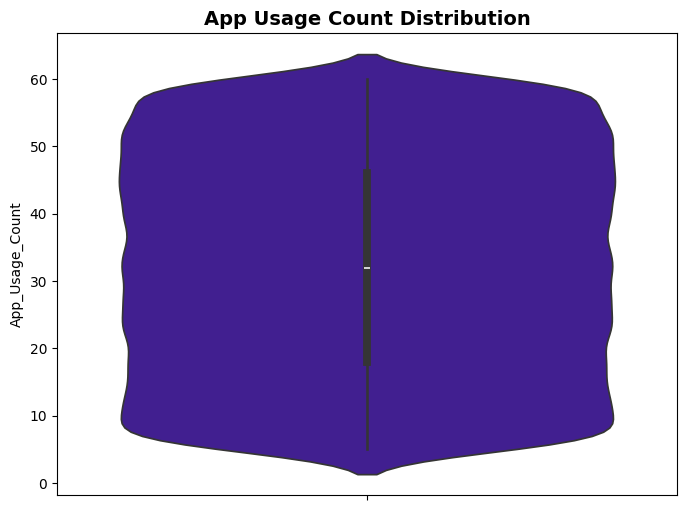

In [21]:
plt.figure(figsize=(8,6))

sns.violinplot(data=df,
               y='App_Usage_Count',
               color='#3A0CA3')

plt.title("App Usage Count Distribution", fontsize=14, fontweight='bold')
plt.show()


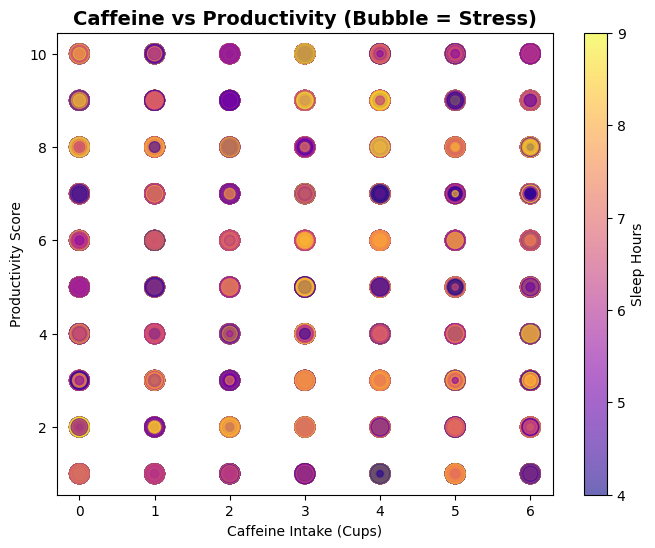

In [22]:
plt.figure(figsize=(8,6))

plt.scatter(df['Caffeine_Intake_Cups'],
            df['Work_Productivity_Score'],
            s=df['Stress_Level']*20,
            c=df['Sleep_Hours'],
            cmap='plasma',
            alpha=0.6)

plt.colorbar(label='Sleep Hours')
plt.title("Caffeine vs Productivity (Bubble = Stress)", fontsize=14, fontweight='bold')
plt.xlabel("Caffeine Intake (Cups)")
plt.ylabel("Productivity Score")
plt.show()


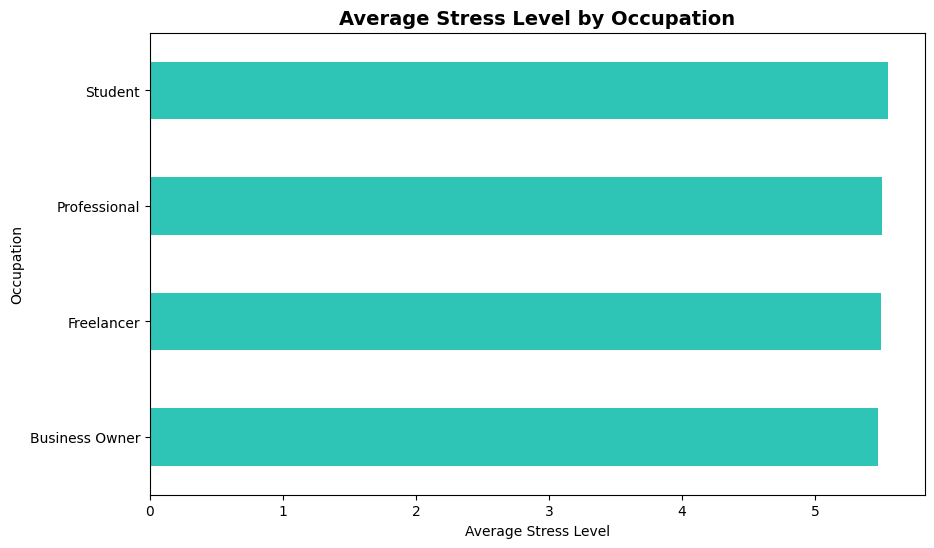

In [23]:
plt.figure(figsize=(10,6))

stress_by_occ = df.groupby('Occupation')['Stress_Level'].mean().sort_values()

stress_by_occ.plot(kind='barh',
                   color='#2EC4B6')

plt.title("Average Stress Level by Occupation", fontsize=14, fontweight='bold')
plt.xlabel("Average Stress Level")
plt.show()


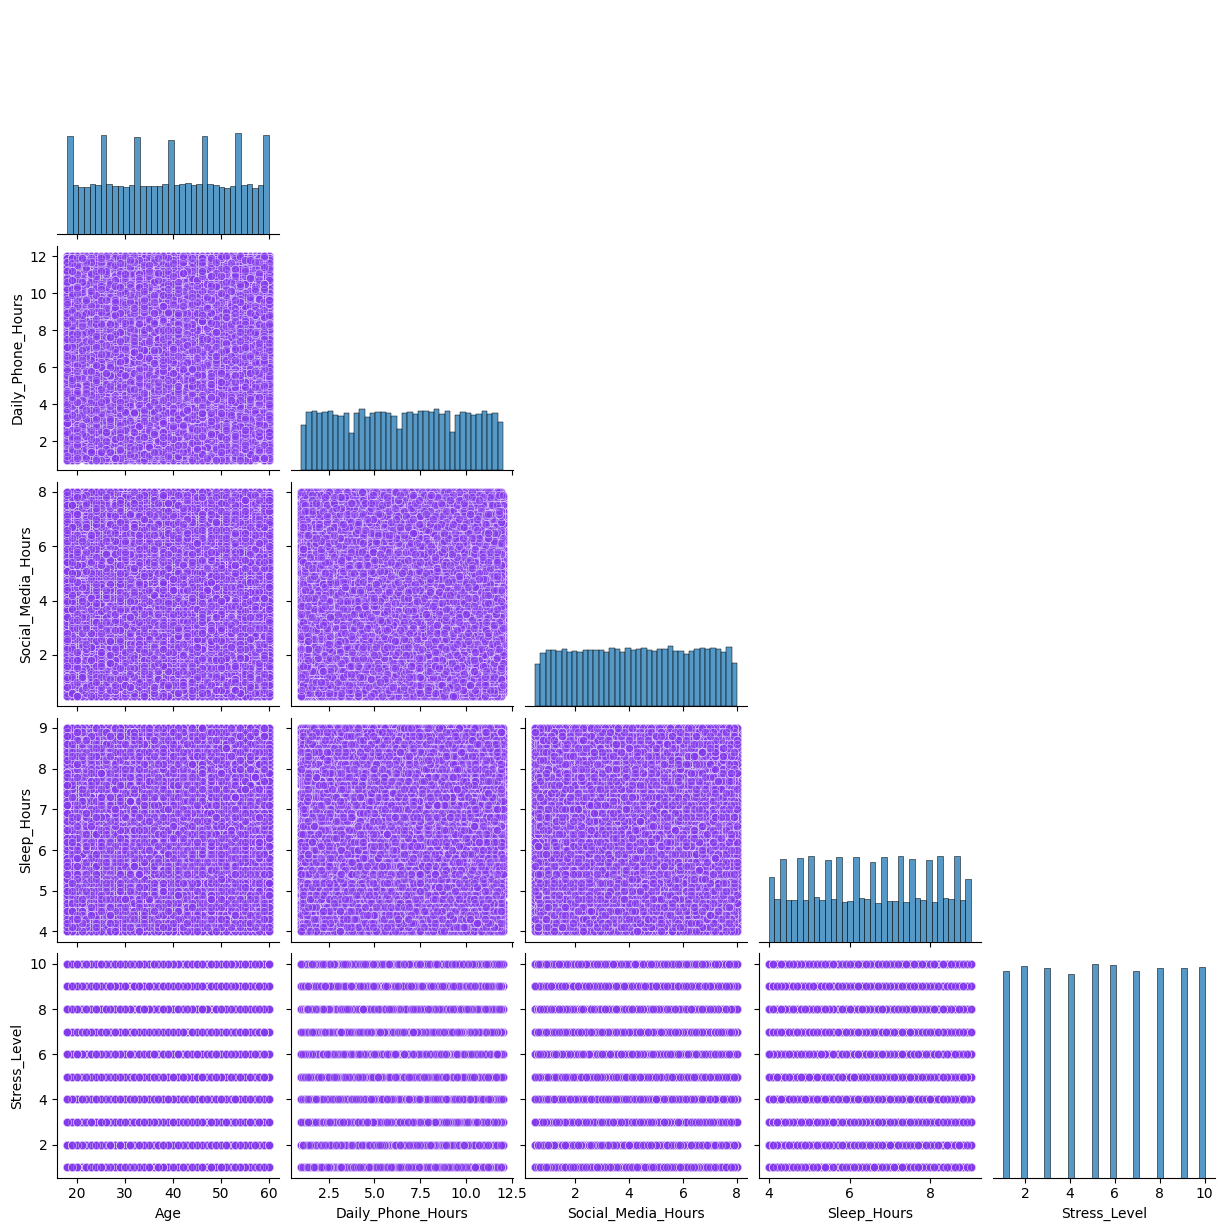

In [24]:
sns.pairplot(df[['Age',
                 'Daily_Phone_Hours',
                 'Social_Media_Hours',
                 'Sleep_Hours',
                 'Stress_Level']],
             corner=True,
             plot_kws={'alpha':0.5, 'color':'#8338EC'})

plt.show()


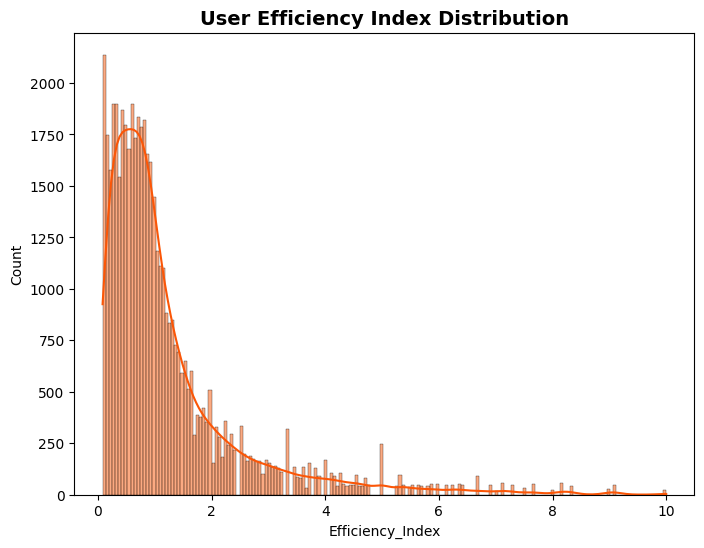

In [25]:
df['Efficiency_Index'] = df['Work_Productivity_Score'] / df['Daily_Phone_Hours']

plt.figure(figsize=(8,6))

sns.histplot(df['Efficiency_Index'],
             kde=True,
             color='#FB5607')

plt.title("User Efficiency Index Distribution", fontsize=14, fontweight='bold')
plt.show()


## Feature engg

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [27]:
df = df.copy()

# If Stress_Level is continuous, convert to classification
df['Stress_Level'] = pd.qcut(df['Stress_Level'], 
                             q=3, 
                             labels=['Low','Medium','High'])

X = df.drop(['Stress_Level', 'User_ID'], axis=1)
y = df['Stress_Level']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [29]:
categorical_cols = ['Gender', 'Occupation', 'Device_Type']
numeric_cols = [col for col in X.columns if col not in categorical_cols]


In [30]:
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)


In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}


In [32]:
results = {}
pipelines = {}

for name, model in models.items():
    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipe.fit(X_train, y_train)
    
    score = pipe.score(X_test, y_test)
    
    results[name] = score
    pipelines[name] = pipe
    
    print(f"\n{name}")
    print(classification_report(y_test, pipe.predict(X_test)))



Logistic Regression
              precision    recall  f1-score   support

        High       0.00      0.00      0.00      3003
         Low       0.40      1.00      0.57      3976
      Medium       0.00      0.00      0.00      3021

    accuracy                           0.40     10000
   macro avg       0.13      0.33      0.19     10000
weighted avg       0.16      0.40      0.23     10000


Decision Tree
              precision    recall  f1-score   support

        High       0.30      0.30      0.30      3003
         Low       0.40      0.40      0.40      3976
      Medium       0.30      0.30      0.30      3021

    accuracy                           0.34     10000
   macro avg       0.33      0.33      0.33     10000
weighted avg       0.34      0.34      0.34     10000


Random Forest
              precision    recall  f1-score   support

        High       0.30      0.17      0.22      3003
         Low       0.39      0.65      0.49      3976
      Medium       0.28 

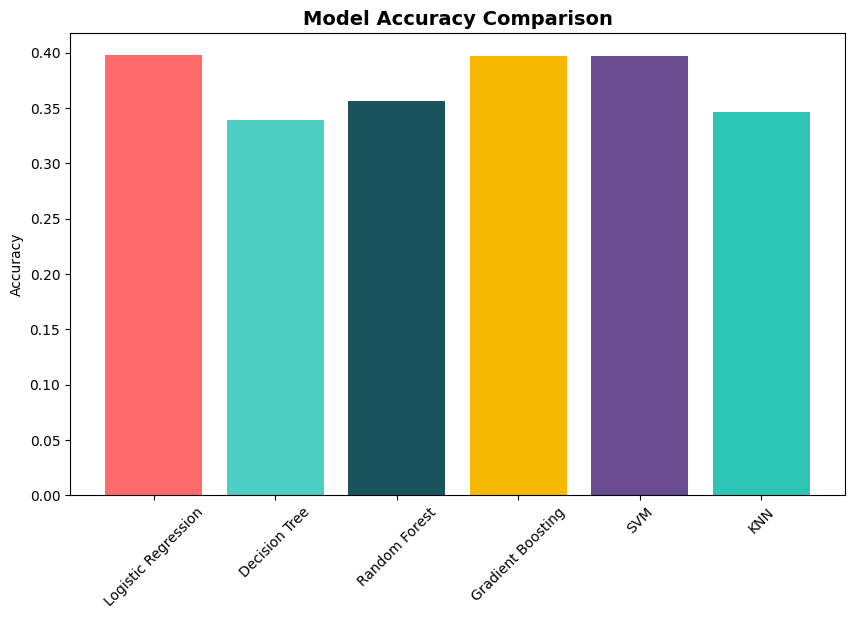

In [33]:
plt.figure(figsize=(10,6))

colors = ['#FF6B6B','#4ECDC4','#1A535C','#F7B801','#6A4C93','#2EC4B6']

plt.bar(results.keys(), results.values(), color=colors)

plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy")
plt.show()


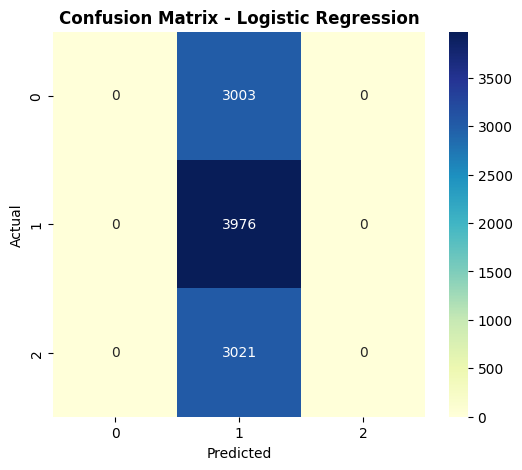

In [34]:
best_model_name = max(results, key=results.get)
best_model = pipelines[best_model_name]

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))

sns.heatmap(cm, 
            annot=True, 
            fmt='d',
            cmap='YlGnBu')

plt.title(f"Confusion Matrix - {best_model_name}", fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


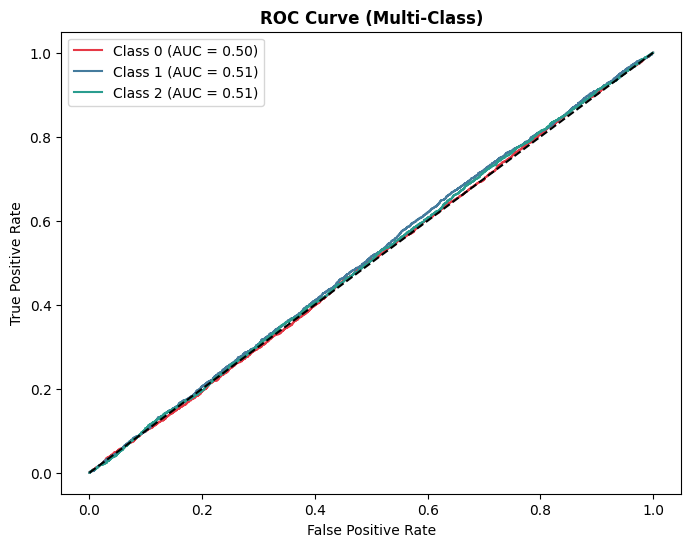

In [35]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test, classes=['Low','Medium','High'])
n_classes = y_test_bin.shape[1]

y_score = best_model.predict_proba(X_test)

plt.figure(figsize=(8,6))

colors = ['#E63946','#457B9D','#2A9D8F']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=colors[i], 
             label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve (Multi-Class)", fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


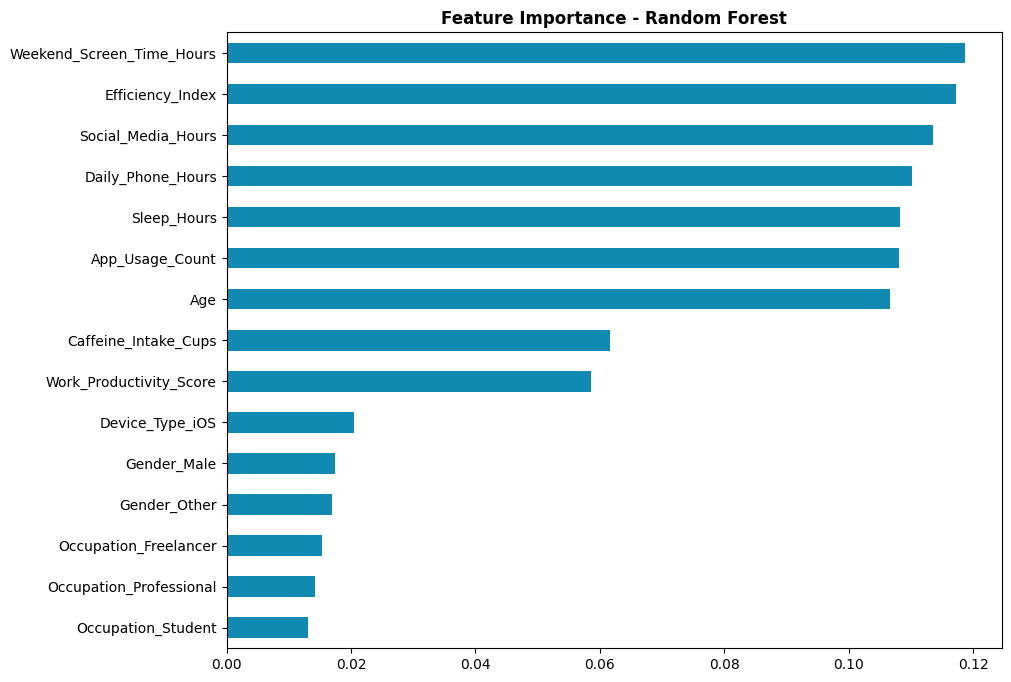

In [36]:
rf_model = pipelines["Random Forest"]

feature_names = (
    numeric_cols +
    list(rf_model.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(categorical_cols))
)

importances = rf_model.named_steps['classifier'].feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values()

plt.figure(figsize=(10,8))

feat_imp.plot(kind='barh', color='#118AB2')

plt.title("Feature Importance - Random Forest", fontweight='bold')
plt.show()


In [37]:
for name, model in models.items():
    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    scores = cross_val_score(pipe, X, y, cv=5)
    
    print(f"{name} CV Accuracy: {scores.mean():.3f}")


Logistic Regression CV Accuracy: 0.398
Decision Tree CV Accuracy: 0.336
Random Forest CV Accuracy: 0.364
Gradient Boosting CV Accuracy: 0.394
SVM CV Accuracy: 0.397
KNN CV Accuracy: 0.347


## Thank you..pls upvote!!!